# Week 4 - Linear and Logistic Machine Learning
#### Part 2
### Notebook created by Jonathan Penava
By the end of this lesson you should know the steps to building a machine learning algorithm and have practiced by using a linear and logistic ML algorithm.

## Overview
- Steps to Machine Learning
- <span style="color:red;">Linear Regression</span>
- Logistic Regression

We are going to try to create a linear regression model to determine realestate prices.  We are going to use techniques we learned from the last few lectures to make predictions.  Let's start by importing our libraries.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Collecting Data
Next we want to read in our data set

In [21]:
#This dataset is a record of 7 common different fish species in fish market sales.
#Source: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction 
re_es = pd.read_csv("Real_estate.csv")

In [22]:
re_es.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [23]:
re_es.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [24]:
re_es.min()

No                                           1.00000
X1 transaction date                       2012.66700
X2 house age                                 0.00000
X3 distance to the nearest MRT station      23.38284
X4 number of convenience stores              0.00000
X5 latitude                                 24.93207
X6 longitude                               121.47353
Y house price of unit area                   7.60000
dtype: float64

In [25]:
re_es.max()

No                                         414.00000
X1 transaction date                       2013.58300
X2 house age                                43.80000
X3 distance to the nearest MRT station    6488.02100
X4 number of convenience stores             10.00000
X5 latitude                                 25.01459
X6 longitude                               121.56627
Y house price of unit area                 117.50000
dtype: float64

### Preparing the Data
Looking at our data we don't have too much to prepare.  All of our data is in numerical values, we don't have any NAN values.  There is a column that doesn't have anything to do with the value of our realestate, which column is it and how do we remove it?

In [26]:
re_es.drop('No', axis=1, inplace=True)
re_es.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


### Choosing a Model
In most cases we want to choose a model that best fits our data.  In this case this data was chosen because we want to test out a trendline.  But why use a trendline for this data?  Consider what we want to do with this data.  We have some set of x variables.  Based on this collection of x variables we want to make a prediction y.  As we change values of x, values of y should change.  Let's try to map some x against y.

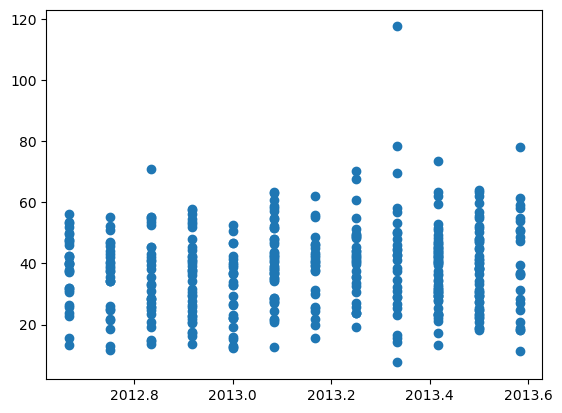

In [27]:
x1 = re_es['X1 transaction date']
y= re_es['Y house price of unit area']
plt.scatter(x1, y, lw=1)

So when we bought doesn't seem to matter, but this is a very narrow time frame for realestate.  We would only expect to see jumps during this time based on external factors such interest rates, government policies, etc.

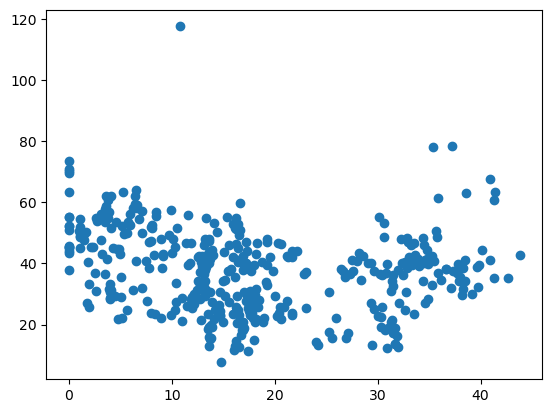

In [28]:
x2 = re_es['X2 house age']
y= re_es['Y house price of unit area']
plt.scatter(x2, y, lw=1)

We can see a weak trend here showing the older the home, the less value it has.  Housing does not decrease in value like cars or electronics, but we can see that the minimum value for a home less than 10 years is higher then the minimum value for a home more than 10 years.

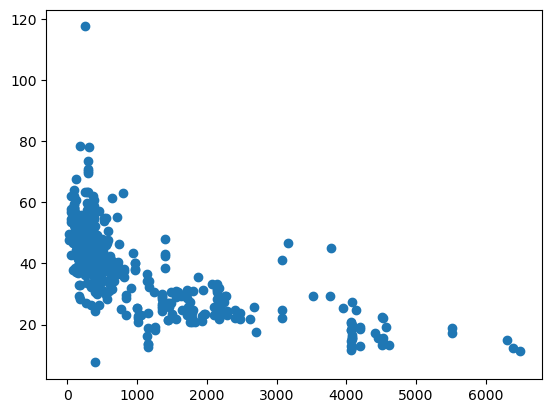

In [29]:
x3 = re_es['X3 distance to the nearest MRT station']
y= re_es['Y house price of unit area']
plt.scatter(x3, y, lw=1)

Much more of a pronounced trend here.  While not linear, we can see that the desire to be closer to a transit system increases the value of property.

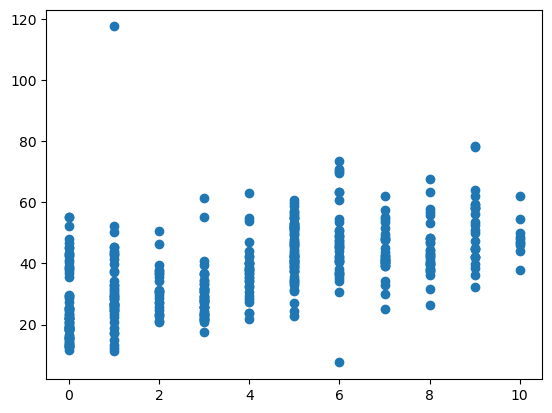

In [30]:
x4 = re_es['X4 number of convenience stores']
y= re_es['Y house price of unit area']
plt.scatter(x4, y, lw=1)

Clearly visible trend that shows more nearby stores increases the value of a property.

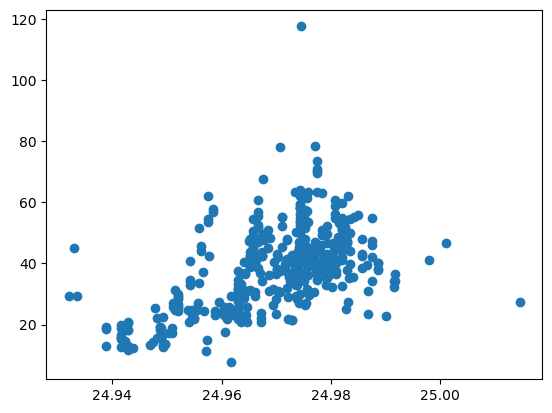

In [31]:
x5 = re_es['X5 latitude']
y= re_es['Y house price of unit area']
plt.scatter(x5, y, lw=1)

It seems that more expensive properties are located closer to 24.98

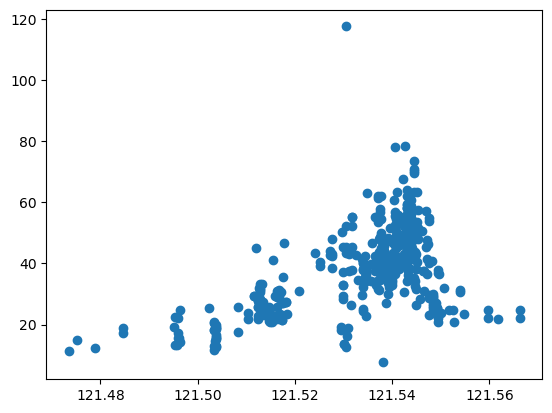

In [32]:
x6 = re_es['X6 longitude']
y= re_es['Y house price of unit area']
plt.scatter(x6, y, lw=1)

It seems that more expensive properties are located closer to 121.54

### Training the Model
We now need to split our data into training and testing data.  Sometimes we will have our training and testing data in 2 separate files.  In this case all of our data is in one file, so we are going to have to split into training and testing.  A good split is usually about 70% for training and about 30% for testing.  These values might fluctuate up and down 5%-10% based on your source.

In [33]:
#Remove the dependent data (our y) from our independent data (our x values)
X, y = re_es.drop('Y house price of unit area', axis=1), re_es['Y house price of unit area'].values

If you want print out the values of X and y to make sure you did it correctly.

In [34]:
#Split the data into training and testing data.  We have chosen a 30% test size for this split. 
#If we look at the last argument the random_state, this is a random number generator seed.  
#Different seed values will determine different selections of data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=87)


In [35]:
#Train the data
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Evaluating the Model
Now that we have trained the model, let's test it out.  How accurate is it?

In [36]:
#Predicting the results
predictions = lm.predict( X_test)
lm.score(X_test, y_test)

0.6577021463270651

### Parameter Tuning
So our model isn't perfect.  Can we do better?  What changes can we make to our data set to improve our accuracy?  Do we remove some columns?  Do we remove some outlier data?  Do we need a larger data set?  Try going back and changing the random_state to the last 2 digits of your id.  Does it make the data more or less accurate?

### Making Predictions
At this point we need to use our model to make a prediction.  Let's modify the values below to whatever you wish and see what you get for a price.

In [37]:
myTest = {
        'X1 transaction date':[2013],
        'X2 house age':[16],
        'X3 distance to the nearest MRT station':[492],
        'X4 number of convenience stores':[4],
        'X5 latitude':[24.9],
        'X6 longitude':[121.5]
       }
df = pd.DataFrame(myTest)
print(lm.predict(df))

[26.40103563]
